### Exploratory Data analysis

1. Finding Top 30 frequent words from the reviews for each book
2. Getting similar common words from both book reviews

In [10]:
import pandas as pd
import pickle

#### Top 30 frequent words for each book

In [4]:
# getting data from document term matrix pickle file
data=pd.read_pickle('reviews_dtm.pkl')
data=data.transpose()
data.head(5)

,The Midnight Library,Anxious People
abandon,1,0
abandoned,2,0
abbott,0,4
abdominal,0,2
abiding,1,0


In [5]:
# sorting the word counts and taking top 30 frequent words
top_dict={}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'The Midnight Library': [('life', 1828),
  ('book', 1328),
  ('wa', 861),
  ('nora', 731),
  ('library', 708),
  ('like', 404),
  ('just', 393),
  ('regret', 390),
  ('different', 384),
  ('midnight', 366),
  ('read', 362),
  ('ha', 356),
  ('story', 319),
  ('time', 316),
  ('thing', 307),
  ('haig', 283),
  ('choice', 270),
  ('way', 221),
  ('really', 220),
  ('live', 220),
  ('make', 218),
  ('matt', 202),
  ('don', 200),
  ('love', 182),
  ('feel', 177),
  ('think', 175),
  ('people', 175),
  ('ve', 173),
  ('death', 173),
  ('decision', 171)],
 'Anxious People': [('book', 1298),
  ('wa', 803),
  ('backman', 638),
  ('people', 637),
  ('story', 602),
  ('bank', 502),
  ('character', 478),
  ('read', 472),
  ('hostage', 433),
  ('just', 339),
  ('robber', 316),
  ('like', 302),
  ('anxious', 285),
  ('time', 268),
  ('really', 262),
  ('love', 255),
  ('way', 237),
  ('apartment', 230),
  ('life', 222),
  ('fredrik', 216),
  ('ha', 212),
  ('author', 209),
  ('loved', 206),
  ('th

##### From the above set of frequent words in two books, some of the words are not making any sense(including authors name). So adding those words to stop words and clean data once more.

In [6]:
# new list of stop words
add_stop_words=['matt','haig','fredrik','backman','ha','wa','don','ve','book','did','didn','story']

In [7]:
# getting corpus pickle file to remove the additional stop words from the corpus 
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
reviews_df=pd.read_pickle('Corpus.pkl')
reviews_df

,Reviews
The Midnight Library,okay no more word this is one of the best sci ...
Anxious People,this is my goodreads choice a best fiction nov...


In [8]:
#Add new stop words to original list
stop_words=text.ENGLISH_STOP_WORDS.union(add_stop_words)

#recreate document term matrix
cv=CountVectorizer(stop_words=stop_words)
reviews_cv=cv.fit_transform(reviews_df.Reviews)
reviews_stop_dtm = pd.DataFrame(reviews_cv.toarray(),columns=cv.get_feature_names())
reviews_stop_dtm.index=reviews_df.index

In [11]:
#save to pickle file 
pickle.dump(cv,open('cv_stop.pkl','wb'))
reviews_stop_dtm.to_pickle('dtm_stop.pkl')

In [12]:
# read document term matrix 
data=pd.read_pickle('dtm_stop.pkl')
data=data.transpose()
data.head(5)

,The Midnight Library,Anxious People
abandon,1,0
abandoned,2,0
abbott,0,4
abdominal,0,2
abiding,1,0


In [13]:
# creating two dicts for different purposes with top 30 frequent words
#  top_dict(for finding common words) --> dict(list) 
#  top_dict_wc(for word cloud) --> dict(dict)

top_dict={}
top_dict_wc={}

for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
    top_dict_wc[c]= dict(zip(top.index, top.values))

top_dict

{'The Midnight Library': [('life', 1828),
  ('nora', 731),
  ('library', 708),
  ('like', 404),
  ('just', 393),
  ('regret', 390),
  ('different', 384),
  ('midnight', 366),
  ('read', 362),
  ('time', 316),
  ('thing', 307),
  ('choice', 270),
  ('way', 221),
  ('live', 220),
  ('really', 220),
  ('make', 218),
  ('love', 182),
  ('feel', 177),
  ('people', 175),
  ('think', 175),
  ('death', 173),
  ('decision', 171),
  ('thought', 167),
  ('character', 163),
  ('end', 162),
  ('want', 162),
  ('loved', 155),
  ('good', 154),
  ('know', 149),
  ('chance', 148)],
 'Anxious People': [('people', 637),
  ('bank', 502),
  ('character', 478),
  ('read', 472),
  ('hostage', 433),
  ('just', 339),
  ('robber', 316),
  ('like', 302),
  ('anxious', 285),
  ('time', 268),
  ('really', 262),
  ('love', 255),
  ('way', 237),
  ('apartment', 230),
  ('life', 222),
  ('author', 209),
  ('loved', 206),
  ('thing', 205),
  ('idiot', 203),
  ('know', 198),
  ('situation', 189),
  ('think', 185),
  ('

##### The above top list of frequent words looks pretty good. Next, I am going to make wordcloud out of these words for visualization.

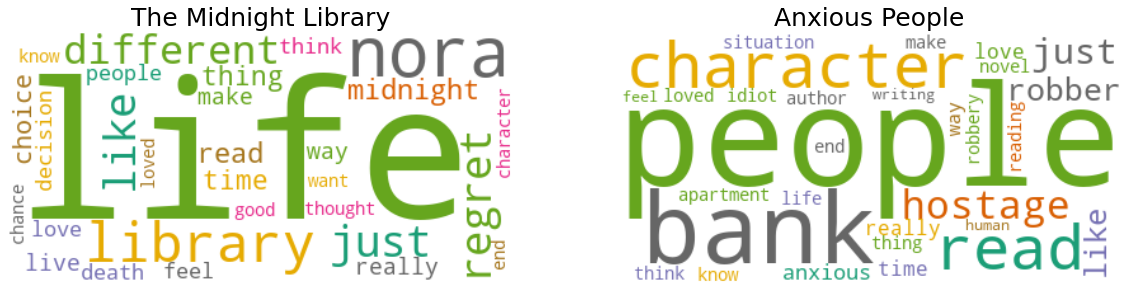

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 6]
i=0
for book,dic in top_dict_wc.items():
    wc= WordCloud(stopwords=stop_words,background_color='White',max_font_size=150,colormap='Dark2',random_state=30)
    wc.generate_from_frequencies(top_dict_wc[book])
    plt.subplot(1, 2, i+1)    
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(book,fontdict={'fontsize': 25})
    i+=1
plt.show()

#### Most common words from both reviews

In [15]:
# See the common words between the two books
from collections import Counter

words = []
for book in data.columns:
    top = [word for (word, count) in top_dict[book]]
    for t in top:
        words.append(t)

freq_words=Counter(words).most_common()
common_words = []

for word in freq_words:
    if word[1] == 2:
        common_words.append(word[0])
        
print(common_words)     

['life', 'like', 'just', 'read', 'time', 'thing', 'way', 'really', 'make', 'love', 'feel', 'people', 'think', 'character', 'end', 'loved', 'know']


##### From the above word cloud, I could infer 'The Midnight Library' could be the story about Life and 'Anxious People' could be the story about People. 
##### There are some common things like life, love, time, people which both books talk about.

### Sentiment analysis

In [18]:
# getting Corpus data
data = pd.read_pickle('Corpus.pkl')
data.head()

,Reviews
The Midnight Library,okay no more word this is one of the best sci ...
Anxious People,this is my goodreads choice a best fiction nov...


In [20]:
# getting polarity and subjectivity scores from textblob
# Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive.
# Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

from textblob import TextBlob

data['Polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['Subjectivity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
data.head(5)

,Reviews,Polarity,Subjectivity
The Midnight Library,okay no more word this is one of the best sci ...,0.170041,0.539699
Anxious People,this is my goodreads choice a best fiction nov...,0.141829,0.577315


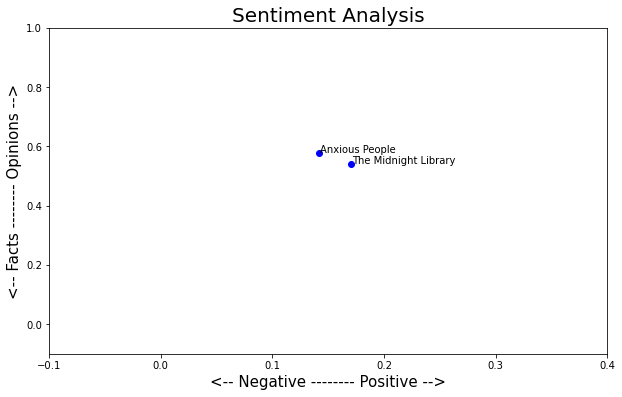

In [51]:
plt.rcParams['figure.figsize'] = [10, 6]
i=0
for index,book in enumerate(data.index):
    x=data.Polarity.loc[book]
    y=data.Subjectivity.loc[book]
    plt.scatter(x,y, color='blue') 
    plt.text(x+.001, y+.001, book, fontsize=10)
    plt.xlim(-0.1, .4)
    plt.ylim(-0.1, 1)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

##### From the above plot, I could see both book reviews have positive polarity as well as subjectivity scores. Both books recieved more or less similar kind of positive reviews.